In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.expand_frame_repr = False

In [2]:
data = pd.DataFrame(columns=["Airport", 
                             "City", 
                             "Scheduled departures", 
                             "Performed departures", 
                             "Enplaned passengers",
                             "Enplaned revenue tons of freight",
                             "Enplaned revenue tons of mail"])

file = open('airportdat.txt', 'r')

for line in file:
    words = []
    first_half = line[:21].strip()
    second_half = line[21:43].strip()
    third_half = line[43:].split()
    words.extend([first_half])
    words.extend([second_half])
    words.extend(third_half)
    data.loc[len(data.index )] = words

data["Scheduled departures"] = data["Scheduled departures"].astype(int)
data["Performed departures"] = data["Performed departures"].astype(int)
data["Enplaned passengers"] = data["Enplaned passengers"].astype(int)
data["Enplaned revenue tons of freight"] = data["Enplaned revenue tons of freight"].astype(float)
data["Enplaned revenue tons of mail"] = data[ "Enplaned revenue tons of mail"].astype(float)
data.head(10)

,Airport,City,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
0,HARTSFIELD INTL,ATLANTA,285693,288803,22665665,165668.76,93039.48
1,BALTO/WASH INTL,BALTIMORE,73300,74048,4420425,18041.52,19722.93
2,LOGAN INTL,BOSTON,114153,115524,9549585,127815.09,29785.72
3,DOUGLAS MUNI,CHARLOTTE,120210,121798,7076954,36242.84,15399.46
4,OHARE INTL,CHICAGO,322430,332338,25636383,300463.80,140359.38
5,DALLAS/FT WORTH INTL,DALLAS/FT WORTH,266737,269665,22899267,142660.95,86706.76
6,LOVE FIELD,DALLAS/FT WORTH,39481,40196,2882836,2216.70,242.87
7,STAPLETON INTL,DENVER,154067,156293,11961839,67345.75,38043.73
8,DETROIT CITY,DETROIT,6828,7162,362655,258.08,0.00
9,WAYNE COUNTY,DETROIT,134929,137565,9903078,42831.24,32429.74


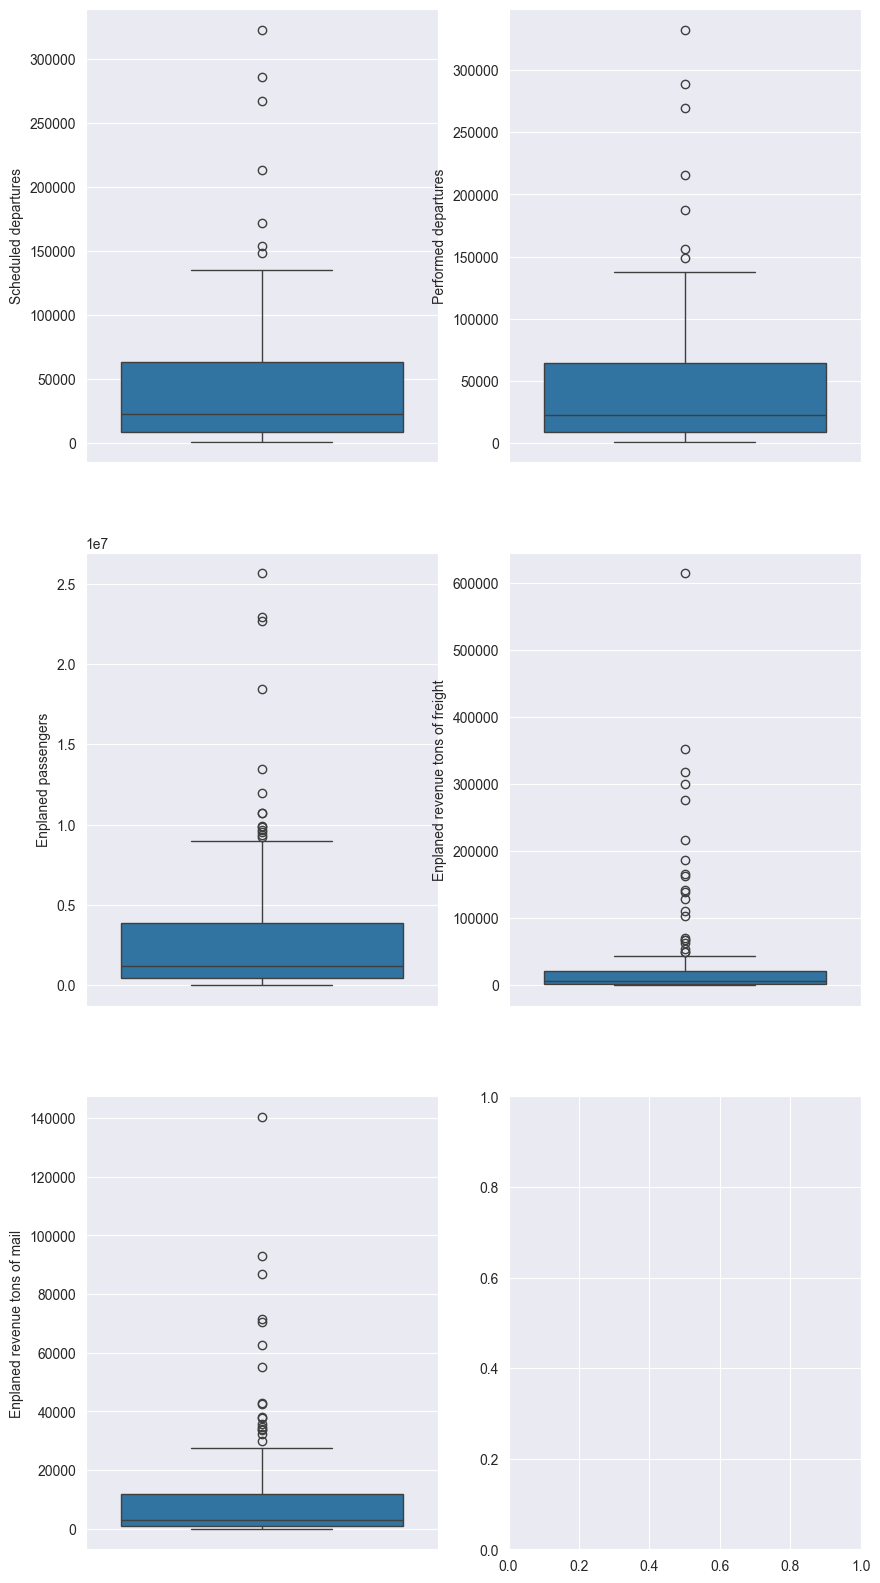

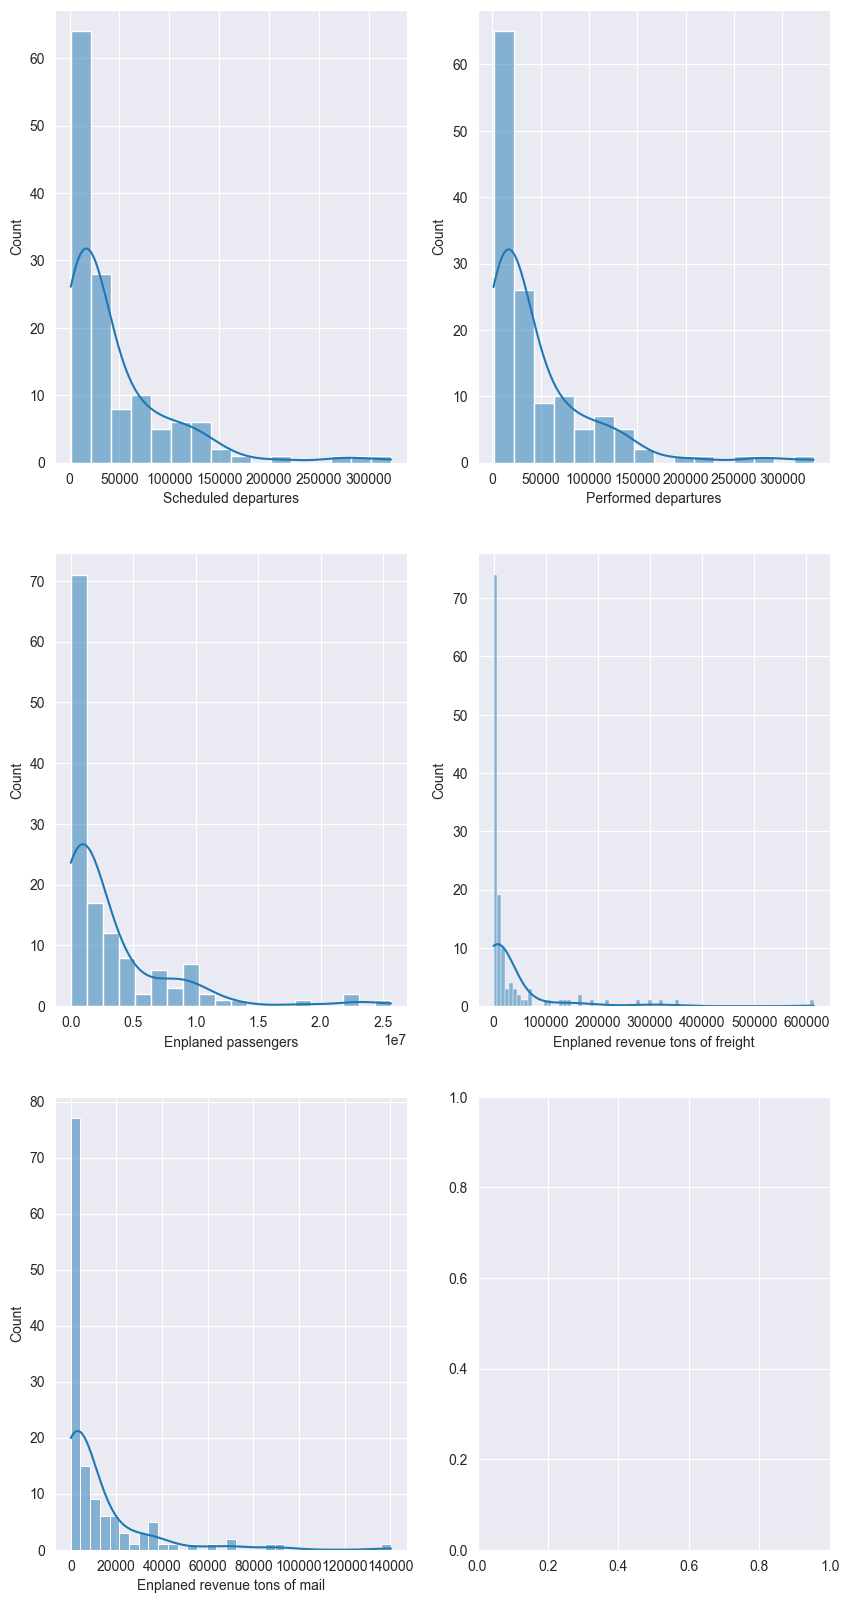

In [3]:
col = ["Scheduled departures", "Performed departures", "Enplaned passengers", "Enplaned revenue tons of freight", "Enplaned revenue tons of mail"]

fig1, axs1 = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))
fig2, axs2 = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

c = 0
for i in range(3):
    for j in range(2):
        if c != len(col):
            sns.boxplot(y=data[col[c]], ax=axs1[i, j])
            sns.histplot(data=data, x=col[c], kde=True, ax=axs2[i, j])
            c += 1


In [4]:
for c in col:
    print(f'{c}:')
    print(f'Выборочное среднее == {np.mean(data[c])}\n'
          f'Выборочная дисперсия == {np.var(data[c], ddof=1)}\n'
          f'Стандартное отклонение == {np.std(data[c], ddof=1)}\n'
          f'Медианное значение == {np.median(data[c])}\n'
          f'I-ая квартиля == {np.percentile(data[c], 25)}\n'
          f'II-ая квартиля == {np.percentile(data[c], 75)}\n')

Scheduled departures:
Выборочное среднее == 45562.42537313433
Выборочная дисперсия == 3202940994.005667
Стандартное отклонение == 56594.53148499126
Медианное значение == 22864.5
I-ая квартиля == 9049.0
II-ая квартиля == 63643.75

Performed departures:
Выборочное среднее == 46304.96268656717
Выборочная дисперсия == 3331108570.3068686
Стандартное отклонение == 57715.75669006574
Медианное значение == 23027.5
I-ая квартиля == 9195.0
II-ая квартиля == 64196.75

Enplaned passengers:
Выборочное среднее == 3136191.925373134
Выборочная дисперсия == 21202724262073.758
Стандартное отклонение == 4604641.599741912
Медианное значение == 1210722.0
I-ая квартиля == 424246.75
II-ая квартиля == 3865530.25

Enplaned revenue tons of freight:
Выборочное среднее == 33858.15768656716
Выборочная дисперсия == 6575904728.799898
Стандартное отклонение == 81091.95230600814
Медианное значение == 6195.27
I-ая квартиля == 1540.135
II-ая квартиля == 20558.9225

Enplaned revenue tons of mail:
Выборочное среднее == 114

,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
Scheduled departures,1.000000,0.999690,0.985058,0.593228,0.898682
Performed departures,0.999690,1.000000,0.984522,0.593499,0.899414
Enplaned passengers,0.985058,0.984522,1.000000,0.581516,0.912898
Enplaned revenue tons of freight,0.593228,0.593499,0.581516,1.000000,0.667230
Enplaned revenue tons of mail,0.898682,0.899414,0.912898,0.667230,1.000000


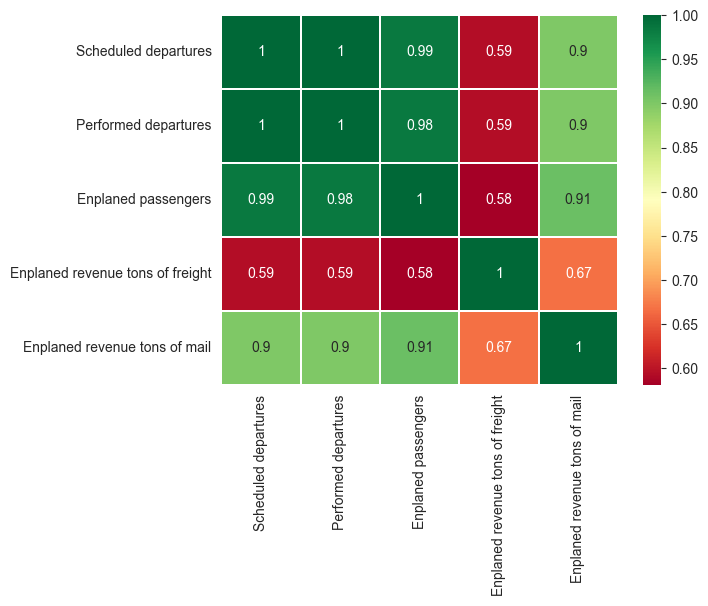

In [5]:
sns.heatmap(data[col].corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
data[col].corr()

In [6]:
data = pd.DataFrame(columns=["Time", 
                             "Sex", 
                             "Birth weight in grams", 
                             "Number of minutes after midnight"])

file = open('babyboomdat.txt', 'r')

for line in file:
    words = line.split()
    data.loc[len(data.index )] = words

data["Birth weight in grams"] = data["Birth weight in grams"].astype(int)
data["Number of minutes after midnight"] = data["Number of minutes after midnight"].astype(int)
data.head(10)

,Time,Sex,Birth weight in grams,Number of minutes after midnight
0,0005,1,3837,5
1,0104,1,3334,64
2,0118,2,3554,78
3,0155,2,3838,115
4,0257,2,3625,177
5,0405,1,2208,245
6,0407,1,1745,247
7,0422,2,2846,262
8,0431,2,3166,271
9,0708,2,3520,428


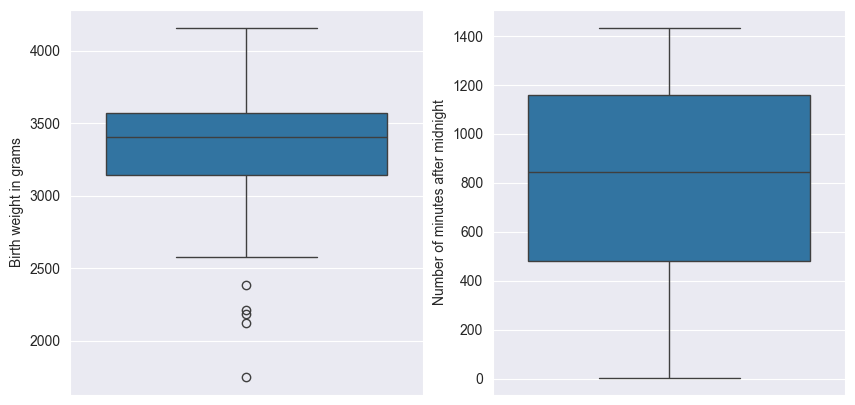

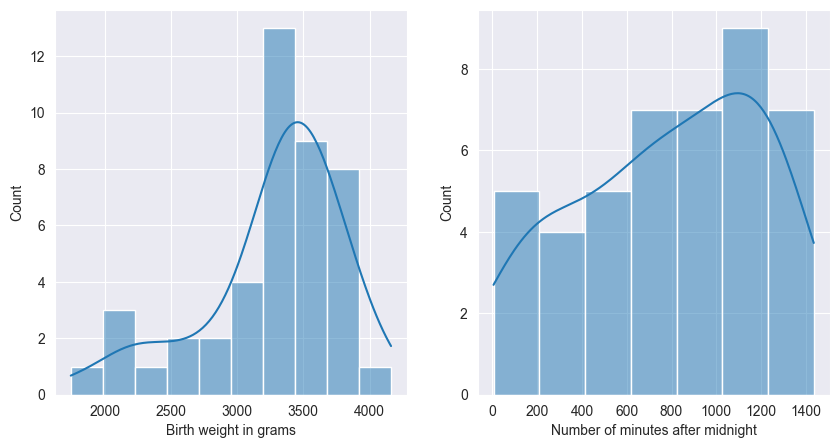

In [7]:
col = ["Birth weight in grams", "Number of minutes after midnight"]

fig1, axs1 = plt.subplots(ncols=2, figsize=(10, 5))
fig2, axs2 = plt.subplots(ncols=2, figsize=(10, 5))

c = 0
for i in range(2):
    if c != len(col):
        sns.boxplot(y=data[col[c]], ax=axs1[i])
        sns.histplot(data=data, x=col[c], kde=True, ax=axs2[i])
        c += 1

In [8]:
for c in col:
    print(f'{c}:')
    print(f'Выборочное среднее == {np.mean(data[c])}\n'
          f'Выборочная дисперсия == {np.var(data[c], ddof=1)}\n'
          f'Стандартное отклонение == {np.std(data[c], ddof=1)}\n'
          f'Медианное значение == {np.median(data[c])}\n'
          f'I-ая квартиля == {np.percentile(data[c], 25)}\n'
          f'II-ая квартиля == {np.percentile(data[c], 75)}\n')

Birth weight in grams:
Выборочное среднее == 3275.9545454545455
Выборочная дисперсия == 278818.27695560263
Стандартное отклонение == 528.0324582405921
Медианное значение == 3404.0
I-ая квартиля == 3141.5
II-ая квартиля == 3571.75

Number of minutes after midnight:
Выборочное среднее == 788.7272727272727
Выборочная дисперсия == 173111.6913319239
Стандартное отклонение == 416.0669313126482
Медианное значение == 846.5
I-ая квартиля == 482.75
II-ая квартиля == 1158.5


,Birth weight in grams,Number of minutes after midnight
Birth weight in grams,1.000000,0.079616
Number of minutes after midnight,0.079616,1.000000


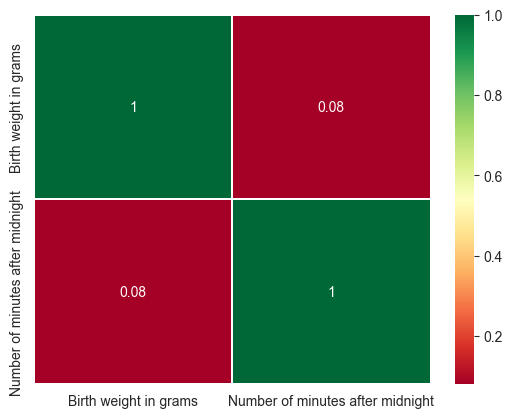

In [9]:
sns.heatmap(data[col].corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
data[col].corr()